# 시계열 데이터의 이해

## 시계열(time series) 데이터란?

- 일정한 시간동안 시간을 통해 수차적으로 발생한 관측치의 집합
- 시간에 관해 순서가 매겨져 있으며, 연속한 관측치는 서로 상관관계를 가지고 있다는 특성

## 시계열 데이터 분석 목적

- 시계열이 갖고 있는 법칙성을 발견해 이를 모델화
- 추정된 모델을 통하여 미래의 값을 예측(Forecasting) 하는 것

## 시계열 자료의 종류

- POS(Point of Sales) 구매 자료 : 불규칙적인 시차
- 일일 코스피 주식 가격
- 월별/분기별/연도별 특정 사건의 수치 : 규칙적인 시차

## 시계열 구성요소

1. 추세 요소 (trend factor)
    - 장기간에 걸치 점진적이고 지속적인 변화 상태
    - 시간의 흐름에 따른 상승 또는 하강 경향
2. 계절 요소 (seasonal factor)
    - 시계열 자료에서 주기적인 패턴을 갖고 반복적으로 나타나는 주기 변경
    - 보통 분기별, 월별 자료에서 나타남
3. 순환 요소 (cycle factor)
    - 경기 변동 이라고도 함
    - 수년 간의 간격을 두고 상승과 하락이 주기적으로 나타나는 변동
    - 계절 변동으로 설명되지 않는 장기적인 변동을 주기 변경
4. 뷸규칙 요소 (irregular/random factor)
    - 사전적으로 예상할 수 없는 특수한 사건에 의해 야기되는 변공(지진, 전쟁, 홍수, 파업)

# 시계열 AI 모델링

## 시계열 분해법

시계열 데이터를 추세/순환/계절성/불규칙 요소로 분해하는 기법 -> 변동요인 확인: `Seasonal_decompose()` 함수 활용

덧셈 분해 (가법, additive decomposition)
- y는 데이터이고, t는 시점, S는 계절 성분, T는 추세 및 순환 성분, R는 불규칙 요소를 의미
- Trend 와 Seasonal 이 별개일 때 사용
- $y_t = S_t + T_t + R_t$

곱셈 분해 (승법, multiplicative decomposition)
- y는 데이터이고, t는 시점, S는 계절 성분, T는 추세 및 순환 성분, R는 불규칙 요소를 의미
- Trend에 따라 Seasonal 변화가 있을 떄 사용
- $y_t = S_t * T_t * R_t$

```
result = seasonal_decompose(df['Close'], model='additive')
result.plot()
```
- Original Data (관측치)
- Trend + Cycle (추세 + 주기)
- Seasonal (계절성)
- Residual (잔차)

## ARIMA 모델

ARIMA (Auto-Regressive Integrated Moving Average) : 자기회귀누적이동평균 모형
- AR(AutoRegression) 모형 + MA(Moving Average) 모형
- 시계열 데이터 분석 기법 중 가장 기본이 되는 모델
- ARIMA 모델은 시계열 데이터의 정상성(Stationary)를 가정하고 있음

정상성 (Stationary) 이란?
- $E(x_t) = \mu$
- $Var(x_t) = \sigma^2$
- $Cov(x_t, x_{t+h}) = Y_h$

비정상성 시계열을 정상성 시계열로 변환하는 방법
- 변동폭이 일정하지 않은 경우 : 로그 변환
- 추세(trend factor), 계절성(seasonal factor)이 존재하는 경우 : 차분 (differencing)
![nn](https://blog.kakaocdn.net/dn/bbkhz8/btq5u4Lq6vo/fu3pdJOKTewZVnY1jenbaK/img.png)

ARIMA 모델은 AR계수, 차분횟수, MA 계수 -> (p, d, q) 결정
- auto_arima 함수 이용하여 자동으로 좋은 (p, d, q) 결정
- `auto_arima = auto_arima(df['AvgTemp'], trace=True)`
- ```
   Best model: ARIMA(1,0,5) (0,0,0) [0] intercept
   Total fit time: 59.824 seconds
   ```

시계열 데이터를 ARIMA 모델 구현
```
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['AvgTemp'], order=(1,0,5))
model = model.fit()
model.summary()

model.plot_predict()
```
![nn](https://miro.medium.com/v2/resize:fit:996/1*bo88HVWzl-vsqhYl5N0KTA.png)

## RNN (Recurrent Neural Network)

- DNN 신경망 : 은닉층에서 나온 결과값은 출력층 방향으로만 향 함
![nn](https://blog.kakaocdn.net/dn/Me6NZ/btqAkybHfbJ/fx5NKmeXgq8nR5XkiStpFK/img.png)

- 은닉층에서 나온 결과값을 출력층 방향으로도 보내면서,
- 다음 은닉층 노드의 입력값으로 보내는 특징 : 이전 정보들을 사용하여 예측하므로, 시계열 데이터 처리에 특화
- Sequence 모델로 순서가 있음
![nn](https://www.researchgate.net/profile/Weijiang_Feng/publication/318332317/figure/fig1/AS:614309562437664@1523474221928/The-standard-RNN-and-unfolded-RNN.png)

## LSTM (Long-Short Term Memory)

- RNN : Sequence 가 길어지면 Gradient Vanishing Problem 발생
- LSTM : Cell States 에 필요한 정보만을 저장, 긴 Sequence 를 더 잘 학습
- 코드 샘플
```
model = Sequential()
model.add(LSTM(3, input_shape=(3,1), activation='relu'))
model.add(Dense(1))
```
![nn](https://ashutoshtripathicom.files.wordpress.com/2021/06/rnn-vs-lstm.png)
![nn](https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/figure1-4ee485edcb5d51bbed8e4fa14d54a649.jpg)

# 시계열 데이터 처리 실습

## 시계열 데이터 가져오기

- 시계열 전처리에서 많이 사용되는 Date 컬럼을 인덱스로 사용하여 쉽게 날짜로 검색
- 시계열 데이터를 시간 간격으로 그룹화하여 단위 시간별 평균 산출
- 시계열 데이터를 이용해서 ARIMA 모델과 RNN 모델을 구현

### 필요 모듈 로딩

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 주가 데이터 읽어오기

In [3]:
df = pd.read_csv('./aapl.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-11,27.242500,27.652500,27.207500,27.254999,25.048595,117630000
1,2016-04-12,27.334999,27.625000,27.165001,27.610001,25.374861,108929200
2,2016-04-13,27.700001,28.084999,27.700001,28.010000,25.742481,133029200
3,2016-04-14,27.905001,28.097500,27.832500,28.025000,25.756268,101895600
4,2016-04-15,28.027500,28.075001,27.432501,27.462500,25.239300,187756000


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1761 non-null   float64
 2   High       1761 non-null   float64
 3   Low        1761 non-null   float64
 4   Close      1761 non-null   float64
 5   Adj Close  1761 non-null   float64
 6   Volume     1761 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.4+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03
mean,83.774472,84.755856,82.853604,83.850068,82.321635,1.167493e+08
std,49.873898,50.548120,49.225033,49.916488,50.330708,5.545315e+07
min,22.500000,22.917500,22.367500,22.584999,20.883038,3.519590e+07
25%,41.500000,42.110001,41.117500,41.610001,39.677227,8.052840e+07
50%,57.102501,57.500000,56.657501,57.090000,55.353104,1.030265e+08
75%,134.990005,136.490005,133.559998,134.869995,133.522751,1.357428e+08
max,182.630005,182.940002,179.119995,182.009995,180.683884,4.584084e+08


## 시계열 데이터 전처리

### Null 값을 interpolate 함수 활용하여 값 채우기

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
cond = (df['Open'].isnull() == True)
cond

0       False
1       False
2       False
3       False
4       False
        ...  
1756    False
1757    False
1758    False
1759    False
1760    False
Name: Open, Length: 1761, dtype: bool

In [9]:
df[cond]

,Date,Open,High,Low,Close,Adj Close,Volume


In [10]:
df['Open'].interpolate(inplace=True)

In [11]:
df[cond]

,Date,Open,High,Low,Close,Adj Close,Volume


In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Volume 타입을 float 변경

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1761 non-null   float64
 2   High       1761 non-null   float64
 3   Low        1761 non-null   float64
 4   Close      1761 non-null   float64
 5   Adj Close  1761 non-null   float64
 6   Volume     1761 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.4+ KB


In [14]:
df['Volume'].astype(np.float64)

0       117630000.0
1       108929200.0
2       133029200.0
3       101895600.0
4       187756000.0
           ...     
1756     68694700.0
1757     56976200.0
1758     46278300.0
1759     51511700.0
1760     45390100.0
Name: Volume, Length: 1761, dtype: float64

In [15]:
# cond = df['Volume'].str.contains(',')

In [16]:
df[cond].head()

,Date,Open,High,Low,Close,Adj Close,Volume


In [17]:
# df['Volume'].str.replace(',','')

In [18]:
df[cond].head()

,Date,Open,High,Low,Close,Adj Close,Volume


In [19]:
df['Volume'] = df['Volume'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1761 non-null   float64
 2   High       1761 non-null   float64
 3   Low        1761 non-null   float64
 4   Close      1761 non-null   float64
 5   Adj Close  1761 non-null   float64
 6   Volume     1761 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


### Pandas to_datetime 이용해서 Date 컬럼 타입을 datetime 으로 변경

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1761 non-null   datetime64[ns]
 1   Open       1761 non-null   float64       
 2   High       1761 non-null   float64       
 3   Low        1761 non-null   float64       
 4   Close      1761 non-null   float64       
 5   Adj Close  1761 non-null   float64       
 6   Volume     1761 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 96.4 KB


In [23]:
df['Date'].dt.year

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1756    2023
1757    2023
1758    2023
1759    2023
1760    2023
Name: Date, Length: 1761, dtype: int64

In [24]:
df['Date'].dt.month

0       4
1       4
2       4
3       4
4       4
       ..
1756    3
1757    4
1758    4
1759    4
1760    4
Name: Date, Length: 1761, dtype: int64

In [25]:
df['Date'].dt.day

0       11
1       12
2       13
3       14
4       15
        ..
1756    31
1757     3
1758     4
1759     5
1760     6
Name: Date, Length: 1761, dtype: int64

In [26]:
df['Date'].dt.time

0       00:00:00
1       00:00:00
2       00:00:00
3       00:00:00
4       00:00:00
          ...   
1756    00:00:00
1757    00:00:00
1758    00:00:00
1759    00:00:00
1760    00:00:00
Name: Date, Length: 1761, dtype: object

### set_index 함수를 이용해서 Date 컬럼을 인덱스 설정

In [27]:
df.index

RangeIndex(start=0, stop=1761, step=1)

In [28]:
df.set_index('Date', inplace=True, drop=True)

In [29]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-11,27.242500,27.652500,27.207500,27.254999,25.048595,117630000.0
2016-04-12,27.334999,27.625000,27.165001,27.610001,25.374861,108929200.0
2016-04-13,27.700001,28.084999,27.700001,28.010000,25.742481,133029200.0
2016-04-14,27.905001,28.097500,27.832500,28.025000,25.756268,101895600.0
2016-04-15,28.027500,28.075001,27.432501,27.462500,25.239300,187756000.0


In [30]:
df.index

DatetimeIndex(['2016-04-11', '2016-04-12', '2016-04-13', '2016-04-14',
               '2016-04-15', '2016-04-18', '2016-04-19', '2016-04-20',
               '2016-04-21', '2016-04-22',
               ...
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06'],
              dtype='datetime64[ns]', name='Date', length=1761, freq=None)

In [31]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700.0
2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56976200.0
2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300.0
2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700.0
2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100.0


### 2023년 데이터 검색

In [32]:
df['2023'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.879326,112117500.0
2023-01-04,126.889999,128.660004,125.080002,126.360001,126.167366,89113600.0
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.829399,80962700.0
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.422394,87754700.0
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.951584,70790800.0


### 2017년 01월 데이터 검색

In [33]:
df.loc['2017-01'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.133324,115127600.0
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.102962,84472400.0
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.240782,88774400.0
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.544474,127007600.0
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.796764,134247600.0


### 2018년 01월 10일 ~ 2018년 01월 20일 데이터 검색

In [34]:
df.loc['2018-01-10':'2018-01-20']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.369915,95839600.0
2018-01-11,43.647499,43.872501,43.622501,43.820000,41.604904,74670800.0
2018-01-12,44.044998,44.340000,43.912498,44.272499,42.034534,101672400.0
2018-01-16,44.474998,44.847500,44.035000,44.047501,41.820911,118263600.0
2018-01-17,44.037498,44.812500,43.767502,44.775002,42.511620,137547200.0
2018-01-18,44.842499,45.025002,44.562500,44.814999,42.549599,124773600.0
2018-01-19,44.652500,44.895000,44.352501,44.615002,42.359707,129700400.0


### 날짜 인덱스에서 month 정보만 따라 추출해보기

In [35]:
df.index

DatetimeIndex(['2016-04-11', '2016-04-12', '2016-04-13', '2016-04-14',
               '2016-04-15', '2016-04-18', '2016-04-19', '2016-04-20',
               '2016-04-21', '2016-04-22',
               ...
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06'],
              dtype='datetime64[ns]', name='Date', length=1761, freq=None)

In [36]:
print(df.index.year[:5])
print(df.index.month[:5])
print(df.index.day[:5])
print(df.index.time[:5])

Int64Index([2016, 2016, 2016, 2016, 2016], dtype='int64', name='Date')
Int64Index([4, 4, 4, 4, 4], dtype='int64', name='Date')
Int64Index([11, 12, 13, 14, 15], dtype='int64', name='Date')
[datetime.time(0, 0) datetime.time(0, 0) datetime.time(0, 0)
 datetime.time(0, 0) datetime.time(0, 0)]


In [37]:
df.index.month.values

array([4, 4, 4, ..., 4, 4, 4])

In [38]:
df['Month'] = df.index.month.values

In [39]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500.0,3
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300.0,3
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200.0,3
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700.0,3
2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700.0,3
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700.0,3
2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56976200.0,4
2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300.0,4
2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700.0,4


### 시각화

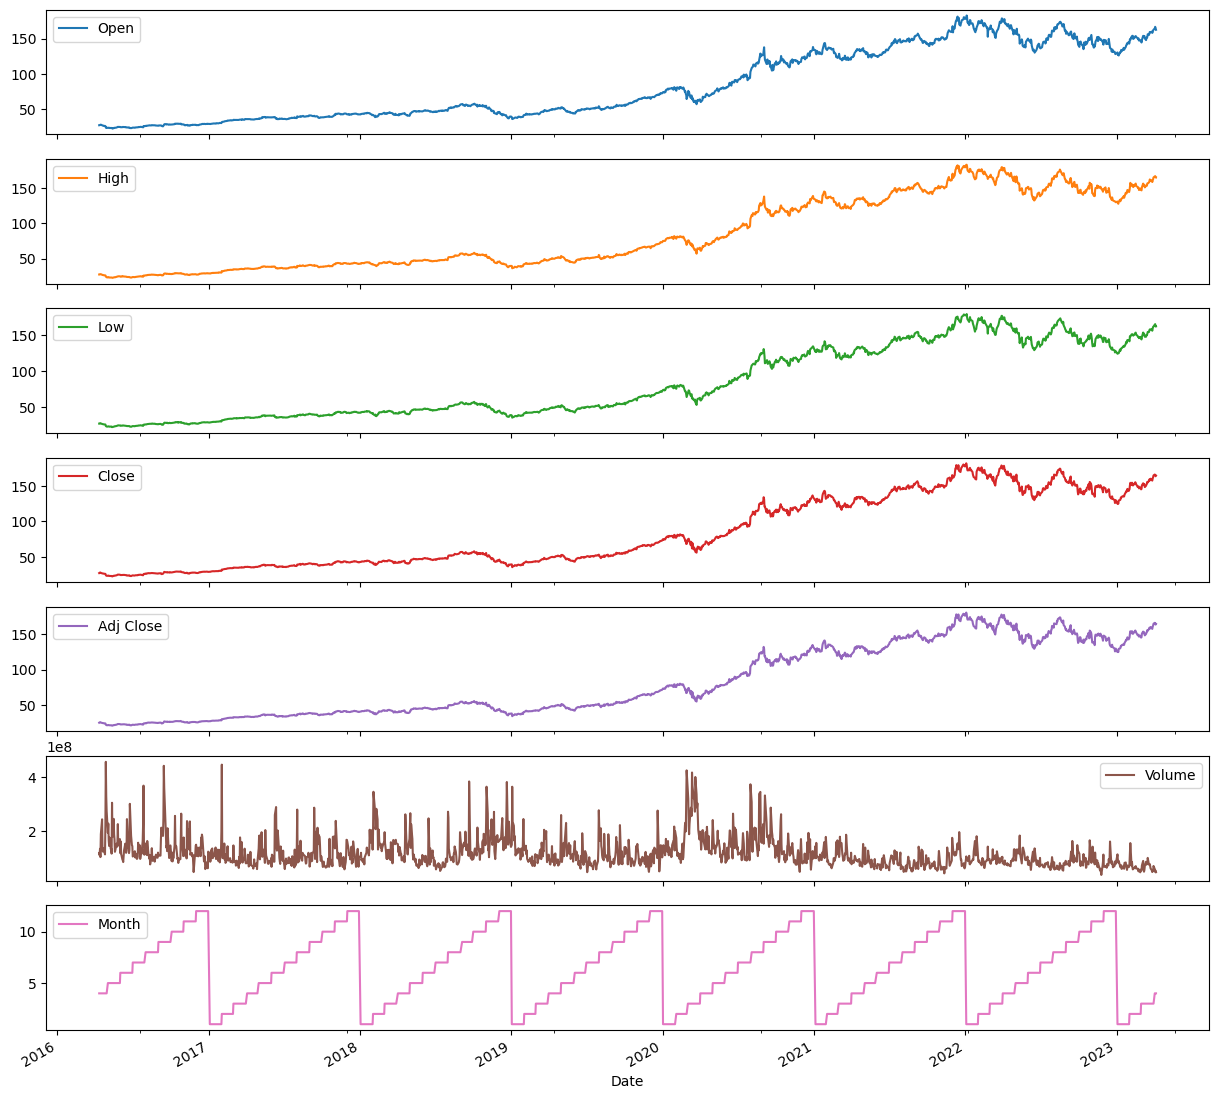

In [40]:
df.plot(subplots=True, figsize=(15,15))
plt.show()

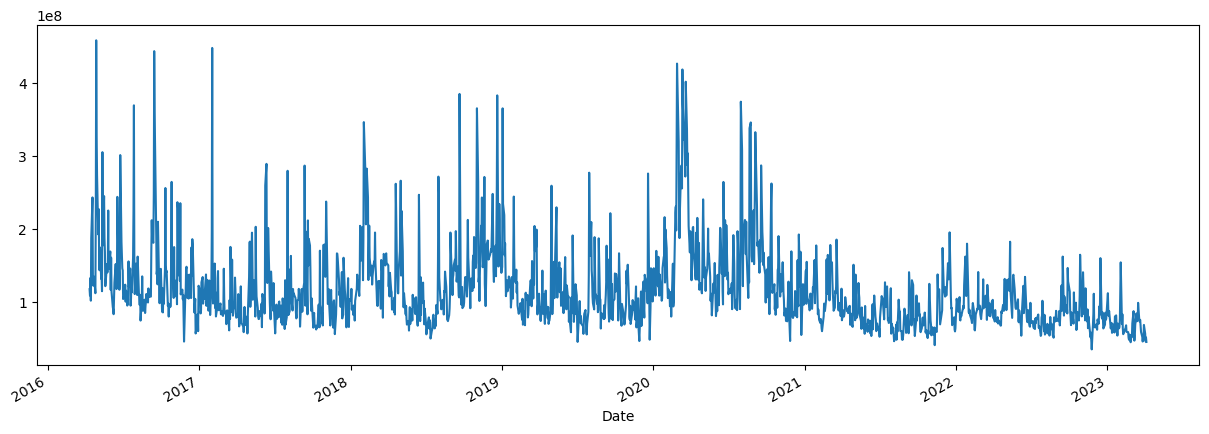

In [41]:
df['Volume'].plot(figsize=(15,5))
plt.show()

### 종가 5일 이동평균값 구하기 - pd.Series.rolling(windows).mean()

In [42]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2016-04-11,27.242500,27.652500,27.207500,27.254999,25.048595,117630000.0,4
2016-04-12,27.334999,27.625000,27.165001,27.610001,25.374861,108929200.0,4
2016-04-13,27.700001,28.084999,27.700001,28.010000,25.742481,133029200.0,4
2016-04-14,27.905001,28.097500,27.832500,28.025000,25.756268,101895600.0,4
2016-04-15,28.027500,28.075001,27.432501,27.462500,25.239300,187756000.0,4


In [43]:
df['Close'].rolling(window=5)

Rolling [window=5,center=False,axis=0,method=single]

In [44]:
df['Close'].rolling(window=5).mean()

Date
2016-04-11           NaN
2016-04-12           NaN
2016-04-13           NaN
2016-04-14           NaN
2016-04-15     27.672500
                 ...    
2023-03-31    160.791998
2023-04-03    162.369998
2023-04-04    163.966000
2023-04-05    164.563999
2023-04-06    165.023999
Name: Close, Length: 1761, dtype: float64

In [45]:
df['Close_5ma'] = df['Close'].rolling(window=5).mean()

In [46]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Month,Close_5ma
Date,,,,,,,,
2016-04-11,27.242500,27.652500,27.207500,27.254999,25.048595,117630000.0,4,NaN
2016-04-12,27.334999,27.625000,27.165001,27.610001,25.374861,108929200.0,4,NaN
2016-04-13,27.700001,28.084999,27.700001,28.010000,25.742481,133029200.0,4,NaN
2016-04-14,27.905001,28.097500,27.832500,28.025000,25.756268,101895600.0,4,NaN
2016-04-15,28.027500,28.075001,27.432501,27.462500,25.239300,187756000.0,4,27.6725
2016-04-18,27.222500,27.237499,26.735001,26.870001,24.694765,243286000.0,4,27.5955
2016-04-19,26.969999,27.000000,26.557501,26.727501,24.563807,129539600.0,4,27.4190
2016-04-20,26.660000,27.022499,26.514999,26.782499,24.614347,122444000.0,4,27.1735
2016-04-21,26.732500,26.732500,26.379999,26.492500,24.347830,126210000.0,4,26.8670


In [47]:
(27.254999 + 27.610001 + 28.010000 + 28.025000 + 27.462500) / 5

27.672500000000003

### 2022년 종가 그래프로 2022년 종가 30일 이동평균선 그래프 그려 비교하기

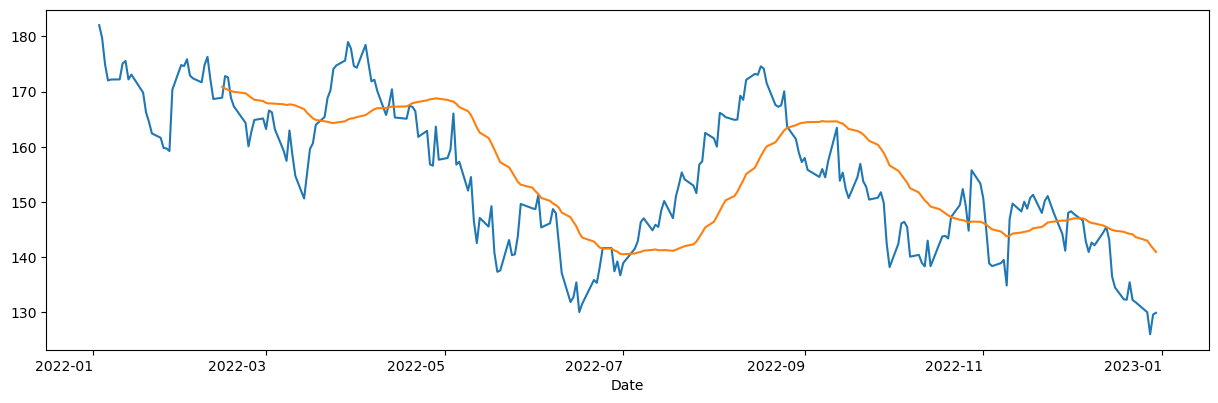

In [48]:
df.loc['2022']['Close'].plot(figsize=(15,5))
df.loc['2022'].rolling(window=30).mean()['Close'].plot()
plt.xticks(rotation=0)
plt.show()

### shift 함수 이용해서 각 샘플에 이전 동가 5일치 데이터 추가하기

In [49]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Month,Close_5ma
Date,,,,,,,,
2016-04-11,27.242500,27.652500,27.207500,27.254999,25.048595,117630000.0,4,NaN
2016-04-12,27.334999,27.625000,27.165001,27.610001,25.374861,108929200.0,4,NaN
2016-04-13,27.700001,28.084999,27.700001,28.010000,25.742481,133029200.0,4,NaN
2016-04-14,27.905001,28.097500,27.832500,28.025000,25.756268,101895600.0,4,NaN
2016-04-15,28.027500,28.075001,27.432501,27.462500,25.239300,187756000.0,4,27.6725


In [50]:
df['Close'].shift(periods=1)

Date
2016-04-11           NaN
2016-04-12     27.254999
2016-04-13     27.610001
2016-04-14     28.010000
2016-04-15     28.025000
                 ...    
2023-03-31    162.360001
2023-04-03    164.899994
2023-04-04    166.169998
2023-04-05    165.630005
2023-04-06    163.759995
Name: Close, Length: 1761, dtype: float64

In [51]:
for i in range(5):
    name = f'Shift_{i+1}'
    df[name] = df['Close'].shift(i+1)

In [52]:
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,Month,Close_5ma,Shift_1,Shift_2,Shift_3,Shift_4,Shift_5
Date,,,,,,,,,,,,,
2016-04-11,27.242500,27.652500,27.207500,27.254999,25.048595,117630000.0,4,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-12,27.334999,27.625000,27.165001,27.610001,25.374861,108929200.0,4,NaN,27.254999,NaN,NaN,NaN,NaN
2016-04-13,27.700001,28.084999,27.700001,28.010000,25.742481,133029200.0,4,NaN,27.610001,27.254999,NaN,NaN,NaN
2016-04-14,27.905001,28.097500,27.832500,28.025000,25.756268,101895600.0,4,NaN,28.010000,27.610001,27.254999,NaN,NaN
2016-04-15,28.027500,28.075001,27.432501,27.462500,25.239300,187756000.0,4,27.6725,28.025000,28.010000,27.610001,27.254999,NaN
2016-04-18,27.222500,27.237499,26.735001,26.870001,24.694765,243286000.0,4,27.5955,27.462500,28.025000,28.010000,27.610001,27.254999
2016-04-19,26.969999,27.000000,26.557501,26.727501,24.563807,129539600.0,4,27.4190,26.870001,27.462500,28.025000,28.010000,27.610001


In [53]:
df.dropna(axis=0, inplace=True)

In [54]:
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,Month,Close_5ma,Shift_1,Shift_2,Shift_3,Shift_4,Shift_5
Date,,,,,,,,,,,,,
2016-04-18,27.222500,27.237499,26.735001,26.870001,24.694765,243286000.0,4,27.5955,27.462500,28.025000,28.010000,27.610001,27.254999
2016-04-19,26.969999,27.000000,26.557501,26.727501,24.563807,129539600.0,4,27.4190,26.870001,27.462500,28.025000,28.010000,27.610001
2016-04-20,26.660000,27.022499,26.514999,26.782499,24.614347,122444000.0,4,27.1735,26.727501,26.870001,27.462500,28.025000,28.010000
2016-04-21,26.732500,26.732500,26.379999,26.492500,24.347830,126210000.0,4,26.8670,26.782499,26.727501,26.870001,27.462500,28.025000
2016-04-22,26.252501,26.620001,26.155001,26.420000,24.281199,134732400.0,4,26.6585,26.492500,26.782499,26.727501,26.870001,27.462500
2016-04-25,26.250000,26.412500,26.127501,26.270000,24.143339,112126400.0,4,26.5385,26.420000,26.492500,26.782499,26.727501,26.870001
2016-04-26,25.977501,26.325001,25.977501,26.087500,23.975616,224064800.0,4,26.4105,26.270000,26.420000,26.492500,26.782499,26.727501


### groupby 함수 이용해서 년도별 시가 및 종가 평균 보기

In [55]:
df.groupby(by=df.index.year)[['Open', 'Close']].mean()

,Open,Close
Date,,
2016,26.461125,26.484333
2017,37.611225,37.637769
2018,47.277859,47.263357
2019,51.967272,52.063988
2020,95.267668,95.347075
2021,140.861866,140.989365
2022,154.802709,154.835060
2023,147.989849,148.611969


### resample 함수 이용해서 월별 종가 평균 보기

- groupby 함수 대신 resample 함수 활용하여 그룹화
- T: mean, H: Hour, D: Day, M: Month, A: Annual

In [56]:
df.resample(rule='A')

In [57]:
df.resample(rule='A').mean()[['Open','Close']]

,Open,Close
Date,,
2016-12-31,26.461125,26.484333
2017-12-31,37.611225,37.637769
2018-12-31,47.277859,47.263357
2019-12-31,51.967272,52.063988
2020-12-31,95.267668,95.347075
2021-12-31,140.861866,140.989365
2022-12-31,154.802709,154.835060
2023-12-31,147.989849,148.611969


In [58]:
df['Close'].resample(rule='1M')

In [59]:
df['Close'].resample(rule='1M').mean().head()

Date
2016-04-30    25.724750
2016-05-31    23.743690
2016-06-30    24.155568
2016-07-31    24.639125
2016-08-31    26.916305
Freq: M, Name: Close, dtype: float64

In [60]:
df['Close'].resample(rule='3M').mean().head(5)

Date
2016-04-30    25.724750
2016-07-31    24.171786
2016-10-31    27.823654
2017-01-31    28.651976
2017-04-30    34.793565
Freq: 3M, Name: Close, dtype: float64

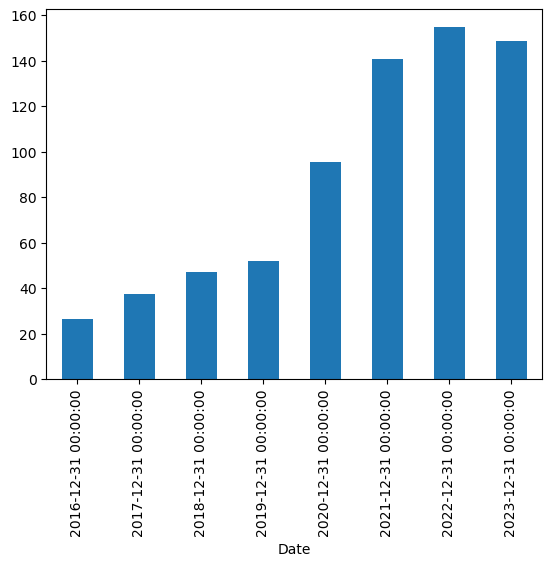

In [61]:
df['Close'].resample(rule='A').mean().plot(kind='bar')
plt.show()

In [62]:
df['Open'].resample(rule='1M').max()

Date
2016-04-30     27.222500
2016-05-31     24.920000
2016-06-30     24.812500
2016-07-31     26.067499
2016-08-31     27.407499
                 ...    
2022-12-31    149.500000
2023-01-31    144.960007
2023-02-28    153.880005
2023-03-31    162.440002
2023-04-30    166.600006
Freq: M, Name: Open, Length: 85, dtype: float64

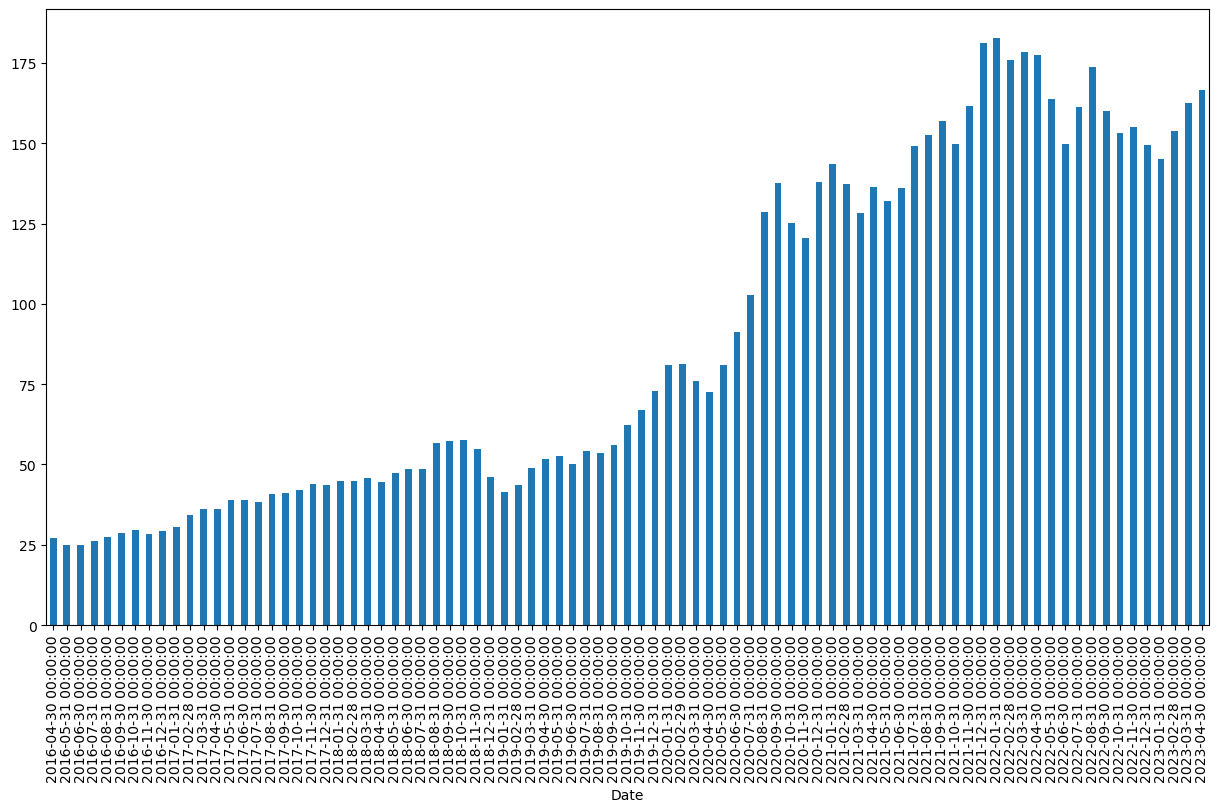

In [63]:
df['Open'].resample(rule='1M').max().plot(kind='bar', figsize=(15,8))
plt.show()

In [64]:
df.loc['2022-06':'2022-12','Open'].resample(rule='M').max()

Date
2022-06-30    149.899994
2022-07-31    161.240005
2022-08-31    173.750000
2022-09-30    159.899994
2022-10-31    153.160004
2022-11-30    155.080002
2022-12-31    149.500000
Freq: M, Name: Open, dtype: float64

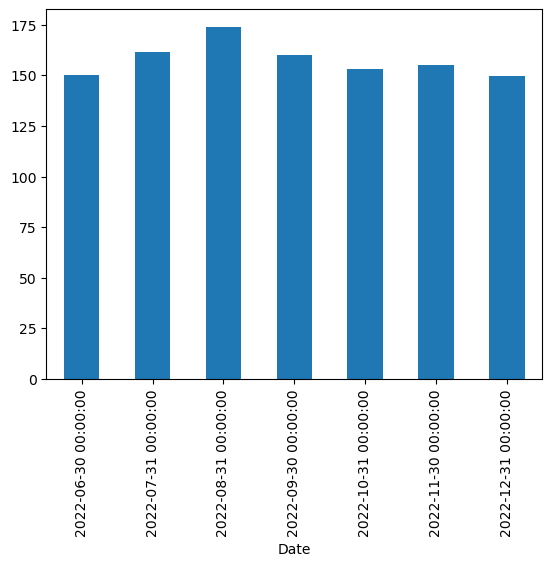

In [65]:
df.loc['2022-06':'2022-12','Open'].resample(rule='M').max().plot(kind='bar')
plt.show()

## 시계열 데이터 AI 모델링

### 시계열 분해법

In [66]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 9.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 5.3 MB/s eta 0:00:00a 0:00:01


In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
# 시계열 분해 (계절성, 가법)
result = seasonal_decompose(df['Close'], model='additive', period=1)

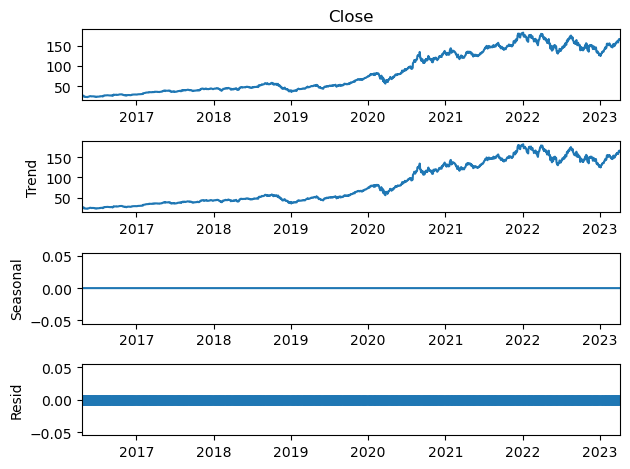

In [69]:
result.plot()
plt.show()

### Auto ARIMA 활용하여 최적 파라미터 찾기

In [72]:
# auto arima 를 위한 패키지 설치
!pip install pmdarima

In [73]:
# auto arima 를 통하여 p,d,q 구하기
from pmdarima.arima import auto_arima

In [74]:
model_arima = auto_arima(df['Close'], trace=True, error_action='ignore', start_p=1, max_p=3, start_q=1, max_q=3, suppress_warnings=True)
model_arima.fit(df['Close'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7310.443, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7313.515, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7310.529, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7310.215, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7314.382, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7310.686, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7312.289, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7311.438, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.143 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

### ARIMA 모델 학습

In [75]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [76]:
model = ARIMA(df.loc[:,'Close'], order=(0,1,1))
model = model.fit()

/Users/rainmaker/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rainmaker/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rainmaker/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


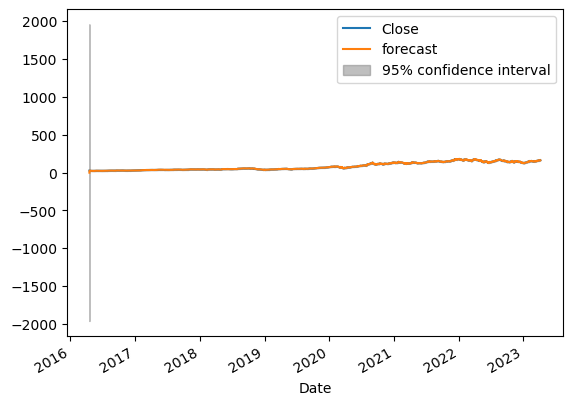

In [77]:
fig, ax = plt.subplots()
df.loc[:,'Close'].plot(ax=ax)
plot_predict(model, ax=ax)
plt.show()

### 종가 데이터를 시계열 형태 데이터로 만들기

##### 시계열데이터 형식: windows=5, 데이터 1,2,3,4,5,6,7,8,9 --> [1,2,3,4,5], [6] 포맷 만들기

In [78]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Month,Close_5ma,Shift_1,Shift_2,Shift_3,Shift_4,Shift_5
Date,,,,,,,,,,,,,
2016-04-18,27.222500,27.237499,26.735001,26.870001,24.694765,243286000.0,4,27.5955,27.462500,28.025000,28.010000,27.610001,27.254999
2016-04-19,26.969999,27.000000,26.557501,26.727501,24.563807,129539600.0,4,27.4190,26.870001,27.462500,28.025000,28.010000,27.610001
2016-04-20,26.660000,27.022499,26.514999,26.782499,24.614347,122444000.0,4,27.1735,26.727501,26.870001,27.462500,28.025000,28.010000
2016-04-21,26.732500,26.732500,26.379999,26.492500,24.347830,126210000.0,4,26.8670,26.782499,26.727501,26.870001,27.462500,28.025000
2016-04-22,26.252501,26.620001,26.155001,26.420000,24.281199,134732400.0,4,26.6585,26.492500,26.782499,26.727501,26.870001,27.462500


In [79]:
split_date = '2023-01-01'

In [80]:
x_train = df[:split_date]['Close']
x_valid = df[split_date:]['Close']

In [81]:
x_train.shape, x_valid.shape

((1690,), (66,))

In [82]:
x_valid.head()

Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
Name: Close, dtype: float64

In [83]:
import tensorflow as tf

2023-04-15 21:25:10.502650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [84]:
# windows size 5일 경우: 1,2,3,4,5,6 ---> [1,2,3,4,5](training_data), [6](validation_data)
# 즉, 5일간 종가와 다음날 종가 형식의 데이터 만들기

def windowed_dataset(series, window_size, batch_size, suffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(suffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    # 메모리에 적재
    return ds.batch(batch_size).prefetch(1)

In [85]:
window_size = 5
batch_size = 32
shuffle_size = 1000

In [87]:
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_size)
validation_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_size)

In [88]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [89]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

### RNN 모델링 만들기

#### SimpleRNN 모델링

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [91]:
EPOCHS = 20

In [92]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_mse', save_best_only=True, save_weights_only=True, verbose=1)

In [93]:
model = Sequential([
    SimpleRNN(32, return_sequences=True, input_shape=(None, 1)),
    SimpleRNN(16, return_sequences=True, activation='relu'),
    Dropout(0.2),
    # return_sequences 를 False 로 함으로써 맨 마지막 하나만 유지
    SimpleRNN(8, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

In [94]:
# model = Sequential([
#     LSTM(32, return_sequences=True, input_shape=(None, 1)),
#     LSTM(16, return_sequences=True, activation='relu'),
#     Dropout(0.2),
#     LSTM(8, activation='relu'),
#     Dropout(0.2),
#     Dense(1)
# ])

In [95]:
model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])

In [96]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=validation_set, callbacks=[es, mc])

Epoch 1/20


2023-04-15 21:25:41.567216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1690,1]
	 [[{{node Placeholder/_0}}]]
2023-04-15 21:25:41.567805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1690,1]
	 [[{{node Placeholder/_0}}]]


     50/Unknown - 2s 4ms/step - loss: 7018.5215 - mae: 68.9761 - mse: 7018.5215

2023-04-15 21:25:43.666621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66,1]
	 [[{{node Placeholder/_0}}]]
2023-04-15 21:25:43.666992: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [66,1]
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_mse improved from inf to 11288.37500, saving model to best_model.h5
53/53 [==============================] - 2s 12ms/step - loss: 6925.3359 - mae: 68.2803 - mse: 6925.3359 - val_loss: 11288.3750 - val_mae: 105.9002 - val_mse: 11288.3750
Epoch 2/20
52/53 [============================>.] - ETA: 0s - loss: 3018.9692 - mae: 44.3065 - mse: 3018.9692
Epoch 2: val_mse improved from 11288.37500 to 2973.45947, saving model to best_model.h5
53/53 [==============================] - 0s 5ms/step - loss: 3009.2673 - mae: 44.2160 - mse: 3009.2673 - val_loss: 2973.4595 - val_mae: 53.9829 - val_mse: 2973.4595
Epoch 3/20
44/53 [=======================>......] - ETA: 0s - loss: 1603.9686 - mae: 29.9044 - mse: 1603.9686
Epoch 3: val_mse improved from 2973.45947 to 352.18604, saving model to best_model.h5
53/53 [==============================] - 0s 6ms/step - loss: 1591.7500 - mae: 29.2503 - mse: 1591.7500 - val_loss: 352.1860 - val_mae: 18.2056 - val_mse: 352.1860
Epoch 4/20
47/53 [=========

#### 성능 그래프

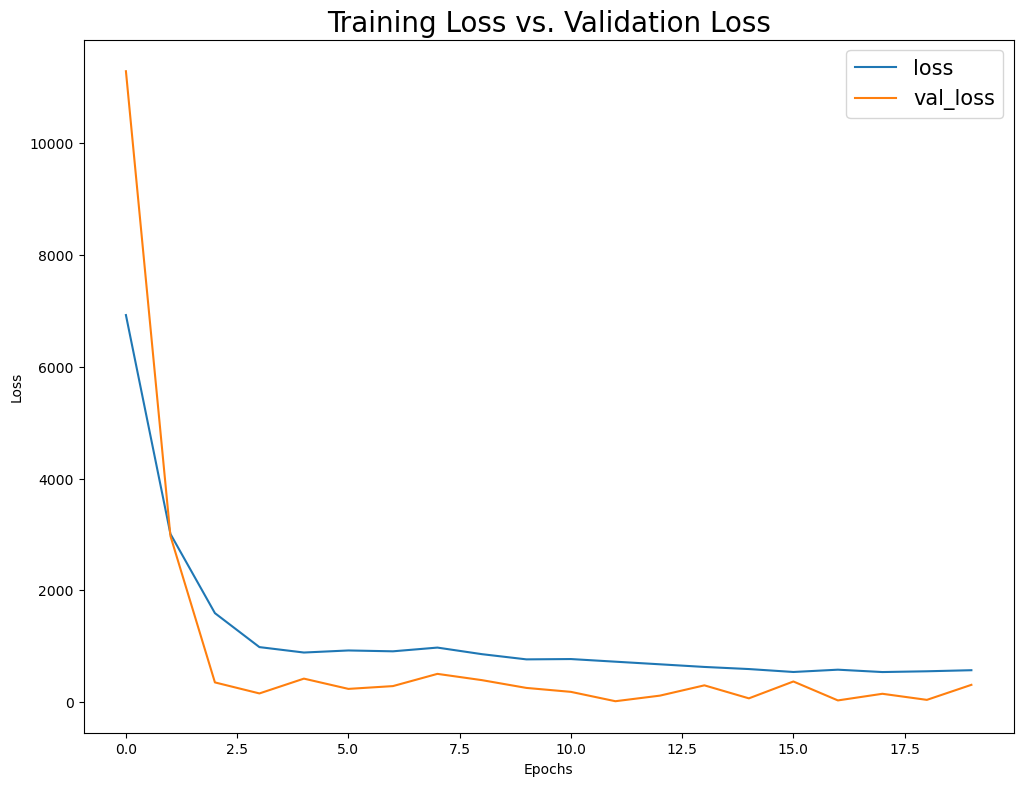

In [97]:
plt.figure(figsize=(12,9))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)

plt.show()

In [98]:
predict_result = model.predict(validation_set)

2/2 [==============================] - 0s 20ms/step


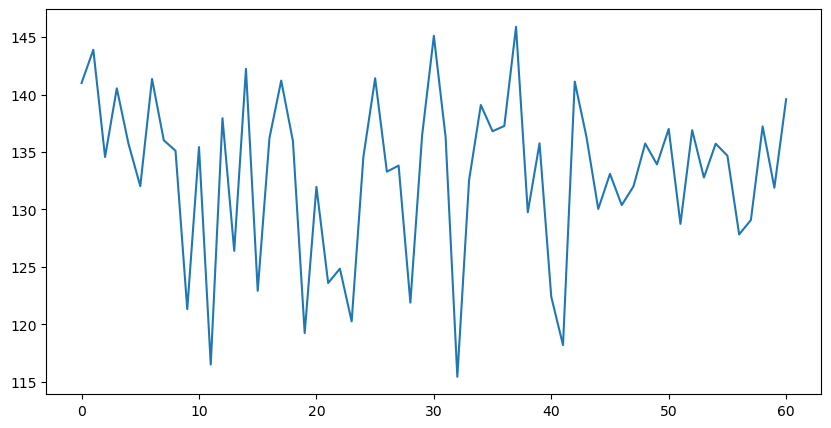

In [99]:
plt.figure(figsize=(10,5))
plt.plot(predict_result)
plt.show()

## 내용 정리

1. AAPL 주가 데이터를 읽어와 데이터 분석 및 데이터 전처리 수행
    - `interpolate` 함수로 null 값을 알맞은 값으로 채우기
    - Pandas 의 `to_datetime` 을 사용하여 Date 컬럼을 datetime 으로 변경
    - `set_index` 함수를 사용하여 Date 컬럼을 인덱스로 설정
    - `rolling` 함수를 사용하여 종가 5일 이동평균 구하기
    - `shift` 함수를 사용하여 종가 컬럼데이터를 아래 칸 내리가 하여, 이전 종가 5일치 데이터를 추가
    - `resample` 함수를 사용하여 년, 월, 사용자 범위의 평균과 최대치 구하기
2. 시계열 분해법, auto_arima 를 통해 최적 파라미터 찾고 ARIMA 모델 수행
3. 시계열 데이터 포맷으로 변경
4. RNN 모델링 수행